# Lab_2 : SVM

# @author : Khadim Mbacke Ndiaye

In [173]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.svm import SVC
import sklearn.metrics as sm
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [174]:
iris = datasets.load_iris()

print(iris)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [175]:
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

In [176]:
x

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


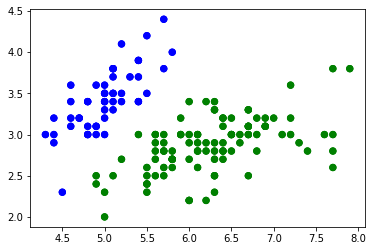

In [187]:
#########################################################################
new_target =  np.where(iris.target<1, 0, 1)
colormap =np.array(['BLUE','GREEN','CYAN'])
plt.scatter(x.Sepal_Length, x.Sepal_width,c=colormap[new_target],s=40)

new_data = x[['Sepal_Length','Sepal_width']]
plt.scatter(new_data.Sepal_Length, new_data.Sepal_width,
            c=colormap[new_target],s=40)

In [188]:
svm = SVC(C=1)
svm.fit(new_data, new_target)
svm.support_vectors_[:, 0]


array([4.9, 4.9, 4.8, 5.8, 5.7, 5.4, 5.1, 5. , 5.2, 5.4, 4.9, 5. , 5.5,
       4.5, 4.8, 4.9, 5.2, 5.6, 5.6, 5.9, 5.4, 6. , 5.6, 5. , 5.7, 5.7,
       5.1, 4.9, 5.6, 7.9, 6.2])

## 1. hyperplan separateur



In [191]:

def hyper_separateur(C, fig_size):
    
    U, V = new_data.Sepal_Length, new_data.Sepal_width
    xx, yy = make_meshgrid(U, V)
    figsize = fig_size
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(U, V, c=new_data.Sepal_Length, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    title = "C= " + str(C)
    ax.set_title(title)

    plt.show()

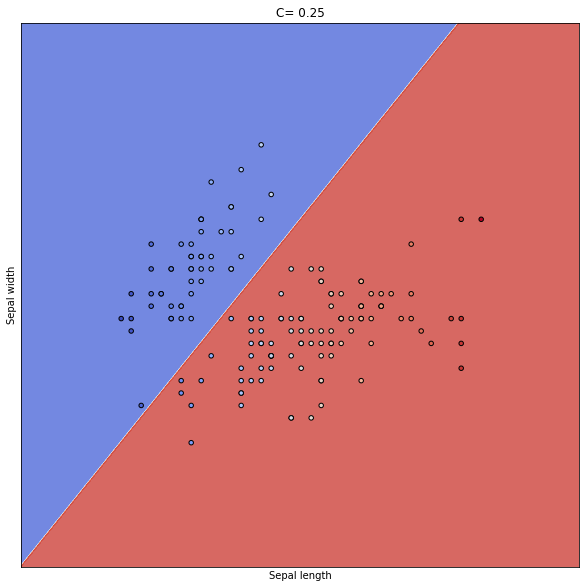

In [194]:
hyper_separateur(0.25, 10)

## 2. Evaluer l'algorithme de classification

In [203]:
y_pred = svc.predict(new_data)
print("Accuracy:", metrics.accuracy_score(y_true=new_target, y_pred=y_pred), "\n")
print("Precison:",metrics.precision_score(y_true=new_target, y_pred=y_pred), "\n")
print("recall:",metrics.recall_score(y_true=new_target, y_pred=y_pred), "\n")

# matrice de confusion
c_matrix = metrics.confusion_matrix(new_target, y_pred)
print("Matrice de correlation:","\n",c_matrix)

Accuracy: 1.0 

Precison: 1.0 

recall: 1.0 

Matrice de correlation: 
 [[ 50   0]
 [  0 100]]


## 3. Choisir le C optimal en utilisant la Validation Croisée 

In [196]:
#creer liste folds avec k=5 et k = 10
k_values = [5, 10]

# liste pour stocker les different valeurs de folds 
folds = []

for i in k_values:
    folds.append(KFold(n_splits = i, shuffle = True, random_state = 101))

In [197]:

c = np.arange(0, 100, 0.25)
              
# dictionnaire d'hyperparametre
hyper_params = [{'C': c}]

              
models_crosv = []

for i in range(2):
    # GridSearchCV()
    model_crosv = GridSearchCV(estimator = svm, param_grid = hyper_params, scoring= 'accuracy', cv = folds[i], verbose = 1,
                                                                                    return_train_score=True, n_jobs = -1)
    models_crosv.append(model_crosv)
    models_crosv[i].fit(new_data, new_target)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 1.         0.99333333 1.         1.         0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.993333

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 1.         1.         1.         1.         0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333 0.99333333
 0.99333333 0.99333333 0.99333333 0.99333333 0.993333

In [198]:
# liste pour stocker la cross validation
cv_results = []

for i in range(len(k_values)):
    cv_r = pd.DataFrame(models_cv[i].cv_results_)
    cv_results.append(cv_r)

In [199]:
#les meilleurs valeurs de parametres trouvees apres k-fold cross-validation
def best_params(models_cv, k_values):
    
    for i in range(len(k_values)):
        best_score = models_cv[i].best_score_
        best_hyperparams = models_cv[i].best_params_
        print("le meilleur score {0} correspondant a l'hyperparametre {1} avec k = {2}".format(best_score, best_hyperparams, k_values[i]))

In [200]:
best_params(models_cv, k_values)

le meilleur score 1.0 correspondant a l'hyperparametre {'C': 0.25} avec k = 5
le meilleur score 1.0 correspondant a l'hyperparametre {'C': 0.25} avec k = 10


In [201]:
best_hyperparams = models_cv[0].best_params_

print("la meilleur valeur de est C : ", best_hyperparams['C'])



la meilleur valeur de est C :  0.25
